In [ ]:
 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [51]:
# Reading whale returns
file_path = 'C:/Users/jiv50/FinTech Working Space/Module 4 Challenge/Module-4-Analysis/Module_4_Starter/Resources/whale_returns.csv'

# Read the CSV file into a DataFrame
whale_returns_df = pd.read_csv(file_path, parse_dates=True, index_col='Date')


print(whale_returns_df.head())
print(whale_returns_df.sort_index)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
<bound method DataFrame.sort_index of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date       

In [52]:
# Count nulls
print(whale_returns_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [121]:
# Drop nulls
print(whale_returns_df.dropna(inplace=True))

None


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [54]:
# Reading algorithmic returns
file_path = 'C:/Users/jiv50/FinTech Working Space/Module 4 Challenge/Module-4-Analysis/Module_4_Starter/Resources/algo_returns.csv'

# Read the CSV file into a DataFrame
algo_returns_df = pd.read_csv(file_path, parse_dates=True, index_col='Date')


print(algo_returns_df.head())
print(algo_returns_df.sort_index)


              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
<bound method DataFrame.sort_index of               Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]>


In [55]:
# Count nulls
print(algo_returns_df.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [56]:
# Drop nulls
print(algo_returns_df.dropna(inplace=True))

None


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [57]:
# Reading S&P 500 Closing Prices
file_path = 'C:/Users/jiv50/FinTech Working Space/Module 4 Challenge/Module-4-Analysis/Module_4_Starter/Resources/sp500_history.csv'

# Read the CSV file into a DataFrame
sp500_history_df = pd.read_csv(file_path, parse_dates=True, index_col='Date')


print(sp500_history_df.head())
print(sp500_history_df.sort_index)

               Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
<bound method DataFrame.sort_index of                Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
...              ...
2012-10-05  $1460.93
2012-10-04  $1461.40
2012-10-03  $1450.99
2012-10-02  $1445.75
2012-10-01  $1444.49

[1649 rows x 1 columns]>


C:\Users\jiv50\AppData\Local\Temp\ipykernel_25156\1570922134.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history_df = pd.read_csv(file_path, parse_dates=True, index_col='Date')


In [58]:
# Check Data Types
df = pd.read_csv('C:/Users/jiv50/FinTech Working Space/Module 4 Challenge/Module-4-Analysis/Module_4_Starter/Resources/sp500_history.csv')
print(df.dtypes)

Date     object
Close    object
dtype: object


In [61]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].astype(str).str.replace('$', '').astype(float)
print(sp500_history_df['Close'].head())
print(sp500_history_df['Close'].sort_index())

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: float64
Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64


In [66]:
# Calculate Daily Returns
sp500_history_df['S&P 500 Daily Returns'] = sp500_history_df['Close'].pct_change()
print(sp500_history_df['S&P 500 Daily Returns'].tail())
print(sp500_history_df['S&P 500 Daily Returns'].sort_index())

Date
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: S&P 500 Daily Returns, dtype: float64
Date
2012-10-01   -0.000872
2012-10-02   -0.003611
2012-10-03   -0.007123
2012-10-04    0.000322
2012-10-05    0.003469
                ...   
2019-04-16    0.002279
2019-04-17   -0.001577
2019-04-18   -0.001011
2019-04-22   -0.008764
2019-04-23         NaN
Name: S&P 500 Daily Returns, Length: 1649, dtype: float64


In [72]:
# Drop nulls
sp500_history_df.dropna(inplace=True)

In [73]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename(columns={'Close': 'S&P 500 Close'}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [77]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df['S&P 500 Daily Returns']], axis='columns', join='inner')
print(combined_returns.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  S&P 500 Da

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

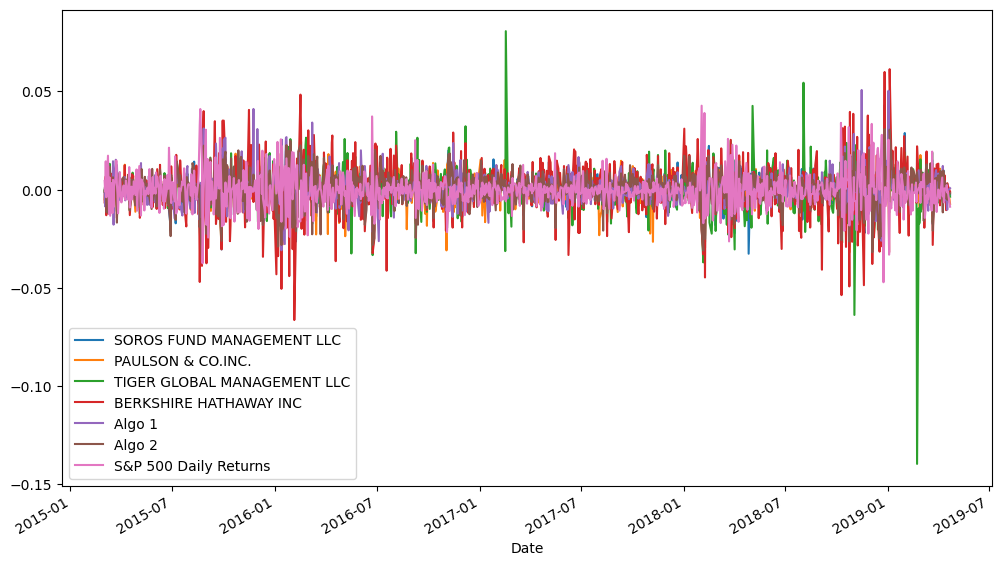

In [81]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(12,7))


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

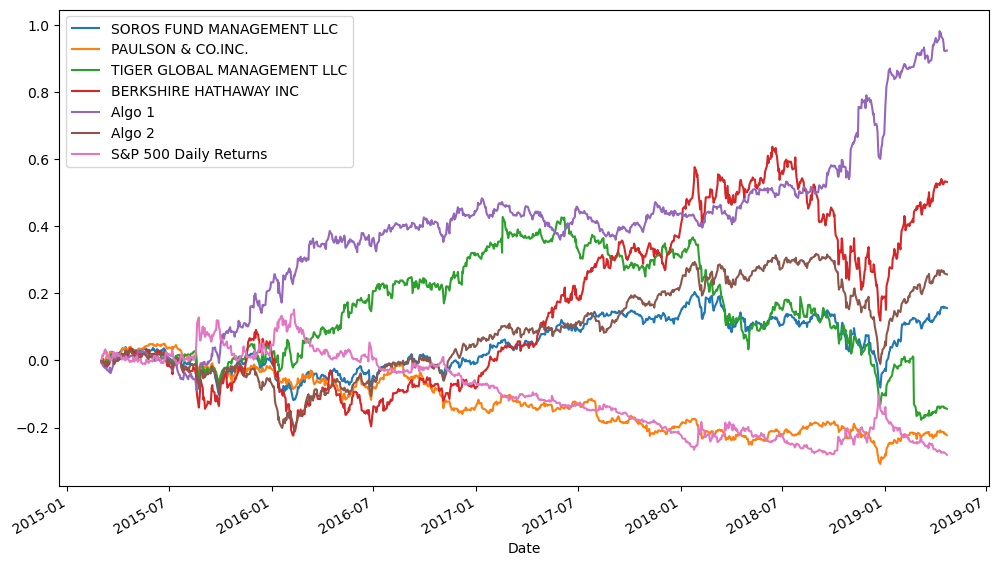

In [83]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,7))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

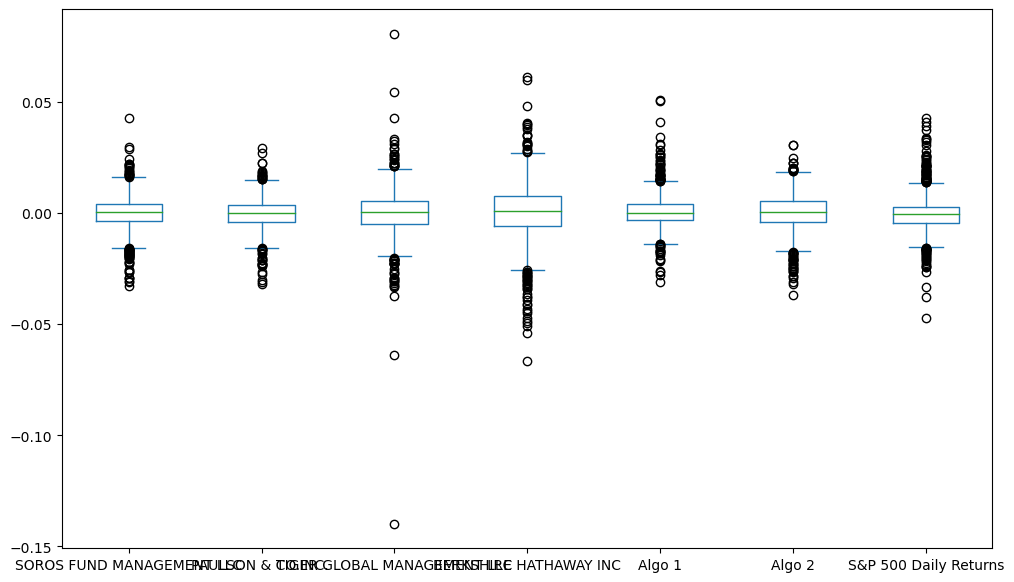

In [123]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(12,7))


### Calculate Standard Deviations

In [90]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
print(daily_std)


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Daily Returns          0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [91]:
# Calculate  the daily standard deviation of S&P 500
riskier_than_sp500 = daily_std[daily_std > daily_std['S&P 500 Daily Returns']]
# Determine which portfolios are riskier than the S&P 500
print(riskier_than_sp500)

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [92]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
print(annualized_std)


SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500 Daily Returns          0.136313
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

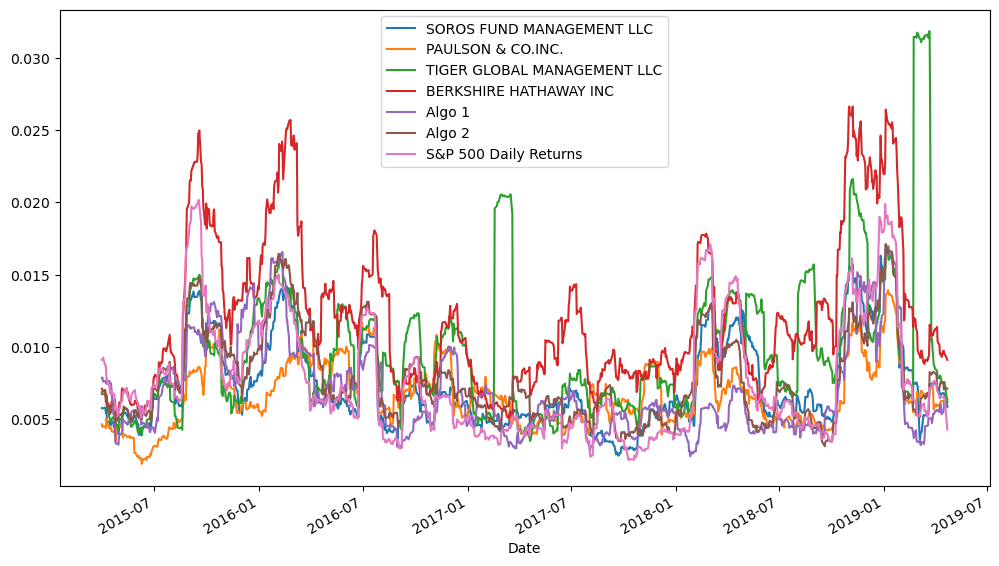

In [93]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(12,7))

### Calculate and plot the correlation

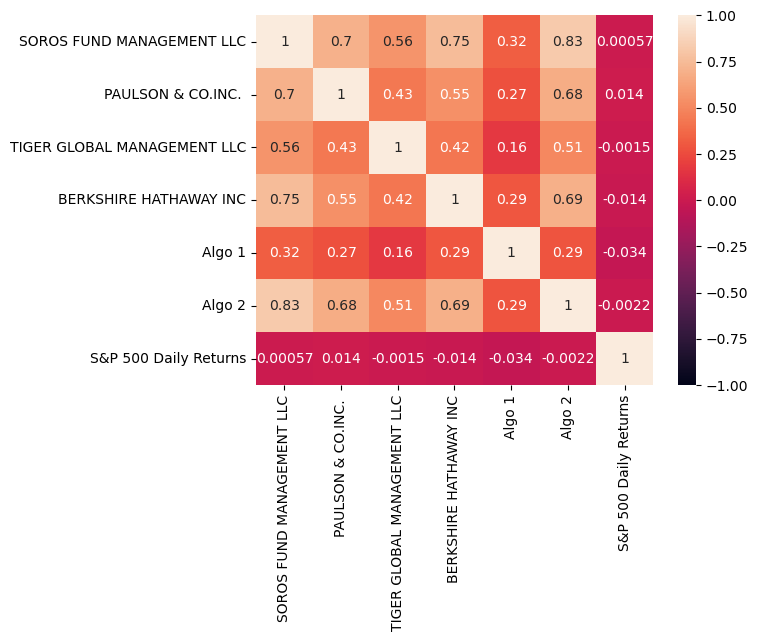

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

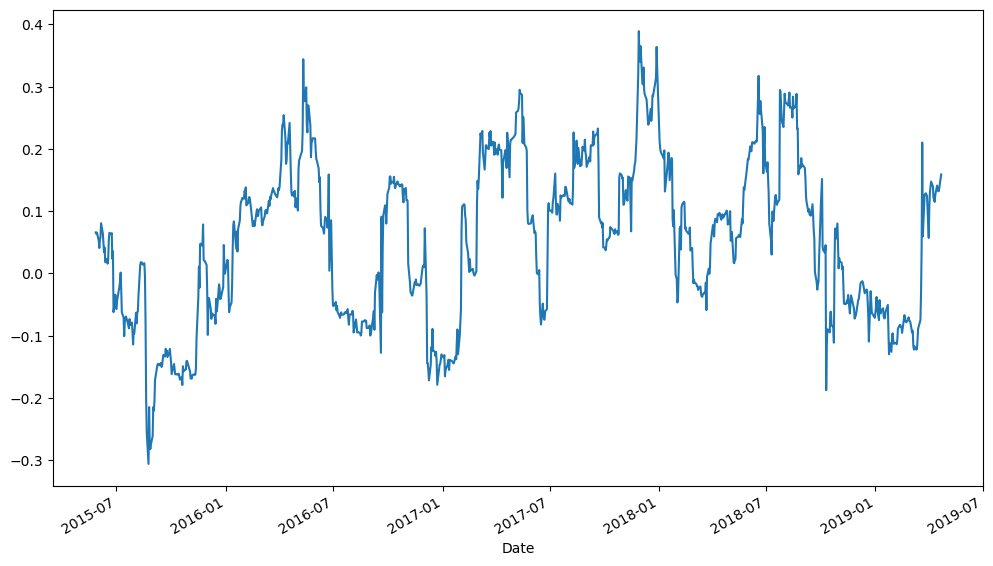

In [106]:
# Calculate covariance of a single portfolio
covariance = combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_returns['S&P 500 Daily Returns'])
# Calculate variance of S&P 500
variance = combined_returns['S&P 500 Daily Returns'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(12,7))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

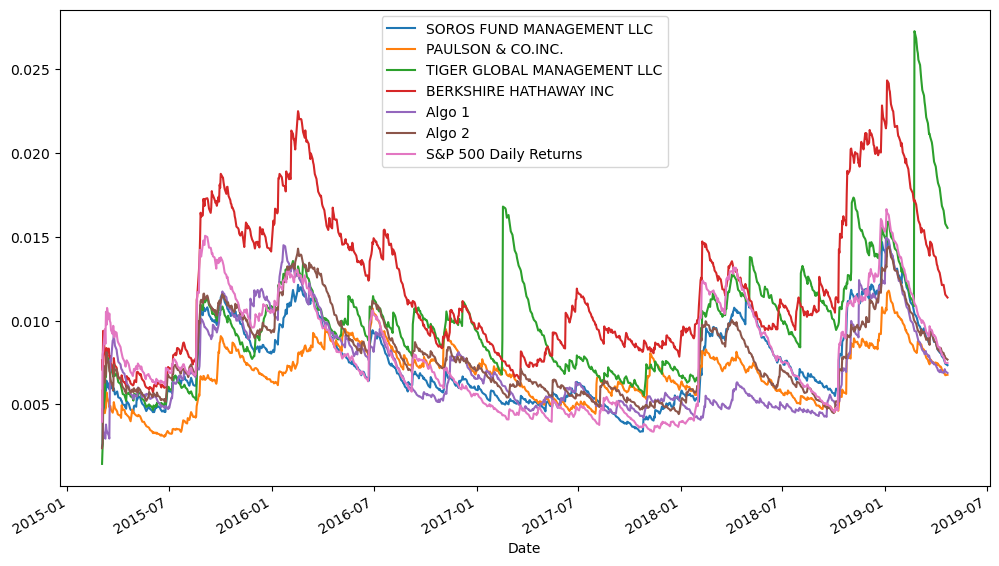

In [108]:
# Use `ewm` to calculate the rolling window
ewm_21 = combined_returns.ewm(halflife=21).std()
ewm_21.plot(figsize=(12, 7))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [109]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_returns.mean() / combined_returns.std() * np.sqrt(252)

<Axes: >

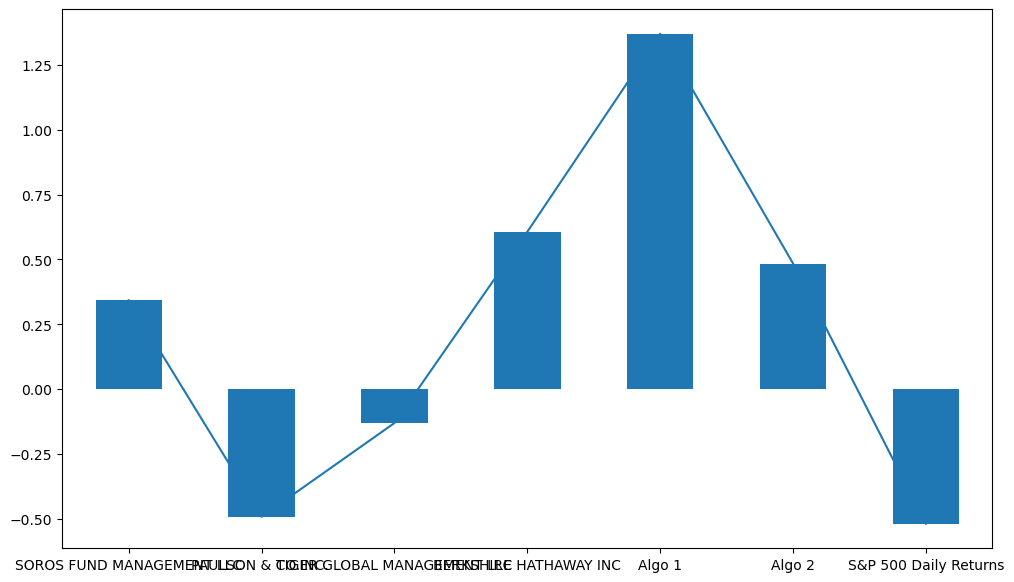

In [117]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')
sharpe_ratios.plot(figsize=(12,7))

In [ ]:
### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Yes

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1]:
# Reading data from 1st stock
tesla = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\TELSA.csv'

In [2]:
# Reading data from 2nd stock
WPM = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\WPM Data.csv'

In [5]:
# Reading data from 3rd stock
FCX = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\FCX_Freeport data.csv'

In [40]:
# Combine all stocks in a single DataFrame
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Define file paths
tesla_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\TELSA.csv'
wpm_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\WPM Data.csv'
fcx_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\FCX_Freeport data.csv'

# Function to load data and calculate returns
def load_and_calculate_returns(file_path, name):
    if os.path.exists(file_path):
        print(f"{name} file exists at the specified path")
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            print(f"{name} data loaded successfully")
            df['Returns'] = df['Close'].pct_change()
            return df
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except OSError as e:
            print(f"OSError: {e}")
    else:
        print(f"{name} file does not exist at the specified path")
        return None

# Load data and calculate returns
tesla = load_and_calculate_returns(tesla_path, 'Tesla')
wpm = load_and_calculate_returns(wpm_path, 'WPM')
fcx = load_and_calculate_returns(fcx_path, 'FCX')

# Ensure all dataframes are loaded correctly
if tesla is not None and wpm is not None and fcx is not None:
    # Combine returns into a single DataFrame
    combined_returns = pd.DataFrame({
        'Tesla': tesla['Returns'],
        'WPM': wpm['Returns'],
        'FCX': fcx['Returns']
    })

    # Display the combined DataFrame
    print("Combined DataFrame of Returns:")
    display(combined_returns.head())
else:
    print("One or more data files could not be loaded.")



Tesla file exists at the specified path
Tesla data loaded successfully
WPM file exists at the specified path
WPM data loaded successfully
FCX file exists at the specified path
FCX data loaded successfully
Combined DataFrame of Returns:


,Tesla,WPM,FCX
Date,,,
2023-01-03 16:00:00,NaN,NaN,NaN
2023-01-04 16:00:00,0.051249,0.034015,0.028481
2023-01-05 16:00:00,-0.029039,0.000477,0.021538
2023-01-06 16:00:00,0.024651,0.031689,0.061245
2023-01-09 16:00:00,0.059349,-0.009700,0.013009


In [41]:
# Reset Date index

# Define file paths
tesla_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\TELSA.csv'
wpm_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\WPM Data.csv'
fcx_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\FCX_Freeport data.csv'

# Function to load data and calculate returns
def load_and_calculate_returns(file_path, name):
    if os.path.exists(file_path):
        print(f"{name} file exists at the specified path")
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            print(f"{name} data loaded successfully")
            df['Returns'] = df['Close'].pct_change()
            return df
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except OSError as e:
            print(f"OSError: {e}")
    else:
        print(f"{name} file does not exist at the specified path")
        return None

# Load data and calculate returns
tesla = load_and_calculate_returns(tesla_path, 'Tesla')
wpm = load_and_calculate_returns(wpm_path, 'WPM')
fcx = load_and_calculate_returns(fcx_path, 'FCX')

# Ensure all dataframes are loaded correctly
if tesla is not None and wpm is not None and fcx is not None:
    # Combine returns into a single DataFrame
    combined_returns = pd.DataFrame({
        'Date': tesla.index,  # Assuming all dataframes have the same index
        'Tesla': tesla['Returns'].values,
        'WPM': wpm['Returns'].values,
        'FCX': fcx['Returns'].values
    })
    
    # Reset the index to include 'Date' as a column
    combined_returns.reset_index(drop=True, inplace=True)
    
    # Display the combined DataFrame
    print("Combined DataFrame of Returns with Date:")
    display(combined_returns.head())
else:
    print("One or more data files could not be loaded.")


Tesla file exists at the specified path
Tesla data loaded successfully
WPM file exists at the specified path
WPM data loaded successfully
FCX file exists at the specified path
FCX data loaded successfully
Combined DataFrame of Returns with Date:


,Date,Tesla,WPM,FCX
0,2023-01-03 16:00:00,NaN,NaN,NaN
1,2023-01-04 16:00:00,0.051249,0.034015,0.028481
2,2023-01-05 16:00:00,-0.029039,0.000477,0.021538
3,2023-01-06 16:00:00,0.024651,0.031689,0.061245
4,2023-01-09 16:00:00,0.059349,-0.009700,0.013009


In [42]:
# Reorganize portfolio data by having a column per symbol

# Define file paths
tesla_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\TELSA.csv'
wpm_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\WPM Data.csv'
fcx_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\FCX_Freeport data.csv'

# Function to load data and calculate returns
def load_and_calculate_returns(file_path, name):
    if os.path.exists(file_path):
        print(f"{name} file exists at the specified path")
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            print(f"{name} data loaded successfully")
            df['Returns'] = df['Close'].pct_change()
            return df[['Returns']]  # Return only the Returns column
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except OSError as e:
            print(f"OSError: {e}")
    else:
        print(f"{name} file does not exist at the specified path")
        return None

# Load data and calculate returns
tesla = load_and_calculate_returns(tesla_path, 'Tesla')
wpm = load_and_calculate_returns(wpm_path, 'WPM')
fcx = load_and_calculate_returns(fcx_path, 'FCX')

# Ensure all dataframes are loaded correctly
if tesla is not None and wpm is not None and fcx is not None:
    # Combine returns into a single DataFrame
    combined_returns = pd.concat([tesla, wpm, fcx], axis=1)
    combined_returns.columns = ['Tesla', 'WPM', 'FCX']
    
    # Reset the index to include 'Date' as a column
    combined_returns.reset_index(inplace=True)
    
    # Display the combined DataFrame
    print("Combined DataFrame of Returns with Date:")
    display(combined_returns.head())
else:
    print("One or more data files could not be loaded.")


Tesla file exists at the specified path
Tesla data loaded successfully
WPM file exists at the specified path
WPM data loaded successfully
FCX file exists at the specified path
FCX data loaded successfully
Combined DataFrame of Returns with Date:


,Date,Tesla,WPM,FCX
0,2023-01-03 16:00:00,NaN,NaN,NaN
1,2023-01-04 16:00:00,0.051249,0.034015,0.028481
2,2023-01-05 16:00:00,-0.029039,0.000477,0.021538
3,2023-01-06 16:00:00,0.024651,0.031689,0.061245
4,2023-01-09 16:00:00,0.059349,-0.009700,0.013009


In [43]:
# Calculate daily returns

# Drop NAs

# Display sample data

# Define file paths
tesla_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\TELSA.csv'
wpm_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\WPM Data.csv'
fcx_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\FCX_Freeport data.csv'

# Function to load data and calculate returns
def load_and_calculate_returns(file_path, name):
    if os.path.exists(file_path):
        print(f"{name} file exists at the specified path")
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            print(f"{name} data loaded successfully")
            df['Returns'] = df['Close'].pct_change()
            return df[['Returns']]  # Return only the Returns column
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except OSError as e:
            print(f"OSError: {e}")
    else:
        print(f"{name} file does not exist at the specified path")
        return None

# Load data and calculate returns
tesla = load_and_calculate_returns(tesla_path, 'Tesla')
wpm = load_and_calculate_returns(wpm_path, 'WPM')
fcx = load_and_calculate_returns(fcx_path, 'FCX')

# Ensure all dataframes are loaded correctly
if tesla is not None and wpm is not None and fcx is not None:
    # Combine returns into a single DataFrame
    combined_returns = pd.concat([tesla, wpm, fcx], axis=1)
    combined_returns.columns = ['Tesla', 'WPM', 'FCX']
    
    # Drop rows with missing values
    combined_returns.dropna(inplace=True)
    
    # Reset the index to include 'Date' as a column
    combined_returns.reset_index(inplace=True)
    
    # Display the combined DataFrame
    print("Combined DataFrame of Returns with Date:")
    display(combined_returns.head())
else:
    print("One or more data files could not be loaded.")


Tesla file exists at the specified path
Tesla data loaded successfully
WPM file exists at the specified path
WPM data loaded successfully
FCX file exists at the specified path
FCX data loaded successfully
Combined DataFrame of Returns with Date:


,Date,Tesla,WPM,FCX
0,2023-01-04 16:00:00,0.051249,0.034015,0.028481
1,2023-01-05 16:00:00,-0.029039,0.000477,0.021538
2,2023-01-06 16:00:00,0.024651,0.031689,0.061245
3,2023-01-09 16:00:00,0.059349,-0.009700,0.013009
4,2023-01-10 16:00:00,-0.007681,0.013526,0.043894


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data

def load_and_calculate_returns(file_path, name):
    if os.path.exists(file_path):
        print(f"{name} file exists at the specified path")
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            print(f"{name} data loaded successfully")
            df['Returns'] = df['Close'].pct_change()
            return df[['Returns']]  # Return only the Returns column
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except OSError as e:
            print(f"OSError: {e}")
    else:
        print(f"{name} file does not exist at the specified path")
        return None

# Load data and calculate returns
tesla = load_and_calculate_returns(tesla_path, 'Tesla')
wpm = load_and_calculate_returns(wpm_path, 'WPM')
fcx = load_and_calculate_returns(fcx_path, 'FCX')

# Ensure all dataframes are loaded correctly
if tesla is not None and wpm is not None and fcx is not None:
    # Combine returns into a single DataFrame
    combined_returns = pd.concat([tesla, wpm, fcx], axis=1)
    combined_returns.columns = ['Tesla', 'WPM', 'FCX']
    
    # Drop rows with missing values
    combined_returns.dropna(inplace=True)
    
    # Reset the index to include 'Date' as a column
    combined_returns.reset_index(inplace=True)
    
    # Set weights for each stock
    weights = [1/3, 1/3, 1/3]
    
    # Calculate portfolio return
    combined_returns['Portfolio'] = combined_returns[['Tesla', 'WPM', 'FCX']].dot(weights)
    
    # Display the combined DataFrame with portfolio returns
    print("Combined DataFrame of Returns with Portfolio Returns:")
    display(combined_returns.head())
else:
    print("One or more data files could not be loaded.")

Tesla file exists at the specified path
Tesla data loaded successfully
WPM file exists at the specified path
WPM data loaded successfully
FCX file exists at the specified path
FCX data loaded successfully
Combined DataFrame of Returns with Portfolio Returns:


,Date,Tesla,WPM,FCX,Portfolio
0,2023-01-04 16:00:00,0.051249,0.034015,0.028481,0.037915
1,2023-01-05 16:00:00,-0.029039,0.000477,0.021538,-0.002341
2,2023-01-06 16:00:00,0.024651,0.031689,0.061245,0.039195
3,2023-01-09 16:00:00,0.059349,-0.009700,0.013009,0.020886
4,2023-01-10 16:00:00,-0.007681,0.013526,0.043894,0.016580


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame

# Function to load data and calculate returns
def load_and_calculate_returns(file_path, name):
    if os.path.exists(file_path):
        print(f"{name} file exists at the specified path")
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            print(f"{name} data loaded successfully")
            df['Returns'] = df['Close'].pct_change()
            return df  # Return the entire DataFrame including 'Close' and 'Returns'
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except OSError as e:
            print(f"OSError: {e}")
    else:
        print(f"{name} file does not exist at the specified path")
        return None

# Load data and calculate returns
tesla = load_and_calculate_returns(tesla_path, 'Tesla')
wpm = load_and_calculate_returns(wpm_path, 'WPM')
fcx = load_and_calculate_returns(fcx_path, 'FCX')

# Ensure all dataframes are loaded correctly
if tesla is not None and wpm is not None and fcx is not None:
    # Combine the original data with returns into a single DataFrame
    combined_data = pd.concat([tesla[['Close', 'Returns']], wpm[['Close', 'Returns']], fcx[['Close', 'Returns']]], axis=1)
    combined_data.columns = ['Tesla Close', 'Tesla Returns', 'WPM Close', 'WPM Returns', 'FCX Close', 'FCX Returns']
    
    # Drop rows with missing values
    combined_data.dropna(inplace=True)
    
    # Set weights for each stock
    weights = [1/3, 1/3, 1/3]
    
    # Calculate portfolio return
    combined_data['Portfolio Returns'] = combined_data[['Tesla Returns', 'WPM Returns', 'FCX Returns']].dot(weights)
    
    # Display the combined DataFrame with portfolio returns
    print("Combined DataFrame of Original Data and Portfolio Returns:")
    display(combined_data.head())
else:
    print("One or more data files could not be loaded.")


Tesla file exists at the specified path
Tesla data loaded successfully
WPM file exists at the specified path
WPM data loaded successfully
FCX file exists at the specified path
FCX data loaded successfully
Combined DataFrame of Original Data and Portfolio Returns:


,Tesla Close,Tesla Returns,WPM Close,WPM Returns,FCX Close,FCX Returns,Portfolio Returns
Date,,,,,,,
2023-01-04 16:00:00,113.64,0.051249,41.95,0.034015,39.00,0.028481,0.037915
2023-01-05 16:00:00,110.34,-0.029039,41.97,0.000477,39.84,0.021538,-0.002341
2023-01-06 16:00:00,113.06,0.024651,43.30,0.031689,42.28,0.061245,0.039195
2023-01-09 16:00:00,119.77,0.059349,42.88,-0.009700,42.83,0.013009,0.020886
2023-01-10 16:00:00,118.85,-0.007681,43.46,0.013526,44.71,0.043894,0.016580


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

# Function to load data and calculate returns
def load_and_calculate_returns(file_path, name):
    if os.path.exists(file_path):
        print(f"{name} file exists at the specified path")
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            print(f"{name} data loaded successfully")
            df['Returns'] = df['Close'].pct_change()
            return df  # Return the entire DataFrame including 'Close' and 'Returns'
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except OSError as e:
            print(f"OSError: {e}")
    else:
        print(f"{name} file does not exist at the specified path")
        return None

# Load data and calculate returns
tesla = load_and_calculate_returns(tesla_path, 'Tesla')
wpm = load_and_calculate_returns(wpm_path, 'WPM')
fcx = load_and_calculate_returns(fcx_path, 'FCX')

# Ensure all dataframes are loaded correctly
if tesla is not None and wpm is not None and fcx is not None:
    # Combine the original data with returns into a single DataFrame
    combined_data = pd.concat([tesla[['Close', 'Returns']], wpm[['Close', 'Returns']], fcx[['Close', 'Returns']]], axis=1)
    combined_data.columns = ['Tesla Close', 'Tesla Returns', 'WPM Close', 'WPM Returns', 'FCX Close', 'FCX Returns']
    
    # Drop rows with missing values in any of the returns columns
    combined_data.dropna(subset=['Tesla Returns', 'WPM Returns', 'FCX Returns'], inplace=True)
    
    # Set weights for each stock
    weights = [1/3, 1/3, 1/3]
    
    # Calculate portfolio return
    combined_data['Portfolio Returns'] = combined_data[['Tesla Returns', 'WPM Returns', 'FCX Returns']].dot(weights)
    
    # Display the combined DataFrame with portfolio returns
    print("Combined DataFrame of Original Data and Portfolio Returns:")
    display(combined_data.head())
else:
    print("One or more data files could not be loaded.")


Tesla file exists at the specified path
Tesla data loaded successfully
WPM file exists at the specified path
WPM data loaded successfully
FCX file exists at the specified path
FCX data loaded successfully
Combined DataFrame of Original Data and Portfolio Returns:


,Tesla Close,Tesla Returns,WPM Close,WPM Returns,FCX Close,FCX Returns,Portfolio Returns
Date,,,,,,,
2023-01-04 16:00:00,113.64,0.051249,41.95,0.034015,39.00,0.028481,0.037915
2023-01-05 16:00:00,110.34,-0.029039,41.97,0.000477,39.84,0.021538,-0.002341
2023-01-06 16:00:00,113.06,0.024651,43.30,0.031689,42.28,0.061245,0.039195
2023-01-09 16:00:00,119.77,0.059349,42.88,-0.009700,42.83,0.013009,0.020886
2023-01-10 16:00:00,118.85,-0.007681,43.46,0.013526,44.71,0.043894,0.016580


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
annualized_std = returns.std() * (252 ** 0.5)
print("Annualized Standard Deviation:")
print(annualized_std)

Annualized Standard Deviation:
Tesla        0.526488
WPM          0.285211
FCX          0.353655
Portfolio    0.281402
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

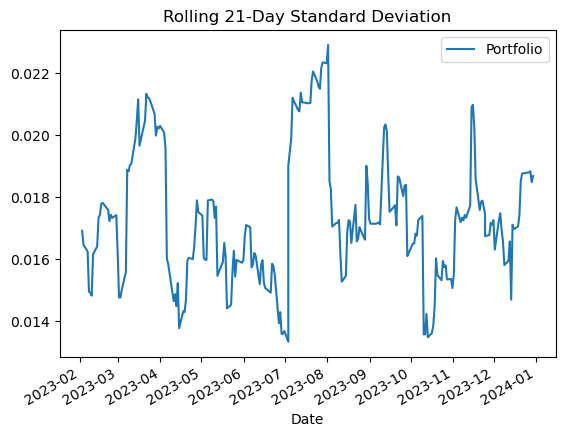

In [48]:
# Calculate rolling standard deviation
rolling_std = returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std[['Portfolio']].plot(title='Rolling 21-Day Standard Deviation')


### Calculate and plot the correlation

In [49]:
# Calculate and plot the correlation
correlation = returns.corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
              Tesla       WPM       FCX  Portfolio
Tesla      1.000000  0.083465  0.246783   0.772491
WPM        0.083465  1.000000  0.400724   0.572656
FCX        0.246783  0.400724  1.000000   0.725997
Portfolio  0.772491  0.572656  0.725997   1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [50]:
# Calculate and plot Beta
sp500_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\S&P_500_index.csv'
try:
    sp500 = pd.read_csv(sp500_path, parse_dates=['Date'], index_col='Date')
    sp500.sort_index(inplace=True)  
    if 'Close' in sp500.columns:
        sp500['Returns'] = sp500['Close'].pct_change()
        print("S&P 500 data head:")
        print(sp500.head())  
    else:
        raise KeyError("The 'Close' column is missing from the S&P 500 data.")
except Exception as e:
    print(f"Error loading S&P 500 data: {e}")

# Ensure 'Returns' column is created in the S&P 500 data
if 'Returns' in sp500.columns:
    # Calculate covariance with portfolio and variance of S&P 500
    cov = returns['Portfolio'].cov(sp500['Returns'])
    var = sp500['Returns'].var()

    # Calculate beta
    beta = cov / var
    print("Beta of the Portfolio:")
    print(beta)
else:
    print("Cannot calculate beta because the 'Returns' column is missing in the S&P 500 data.")


S&P 500 data head:
                     Close   Returns
Date                                
2023-01-03 16:00:00   0.58       NaN
2023-01-04 16:00:00   0.57 -0.017241
2023-01-06 16:00:00   0.53 -0.070175
2023-01-09 16:00:00   0.56  0.056604
2023-01-10 16:00:00   0.56  0.000000
Beta of the Portfolio:
0.010426566072411055


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = returns.mean() / returns.std() * (252 ** 0.5)
print("Sharpe Ratios:")
print(sharpe_ratio)

Sharpe Ratios:
Tesla        1.863227
WPM          0.836413
FCX          0.506667
Portfolio    1.843294
dtype: float64


Tesla file exists at the specified path
Tesla data loaded successfully
WPM file exists at the specified path
WPM data loaded successfully
FCX file exists at the specified path
FCX data loaded successfully
Sharpe Ratios:


Tesla Returns        1.741051
WPM Returns          0.765764
FCX Returns          0.458642
Portfolio Returns    1.569743
dtype: float64

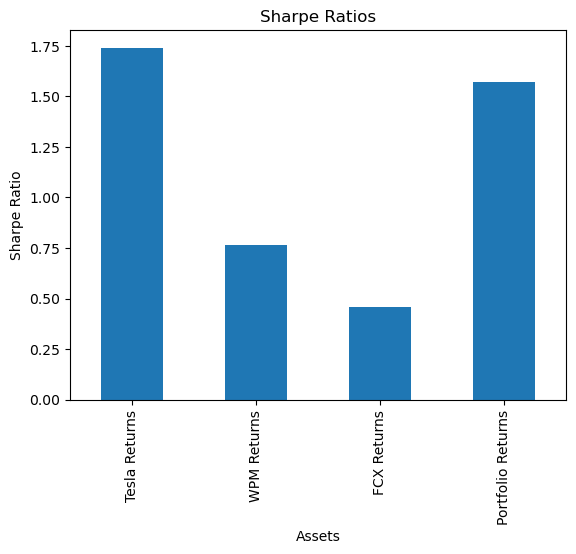

In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Define file paths
tesla_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\TELSA.csv'
wpm_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\WPM Data.csv'
fcx_path = r'C:\Users\jiv50\FinTech Working Space\Module 4 Challenge\Data for Port\FCX_Freeport data.csv'

# Function to load data and calculate returns
def load_and_calculate_returns(file_path, name):
    if os.path.exists(file_path):
        print(f"{name} file exists at the specified path")
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            print(f"{name} data loaded successfully")
            df['Returns'] = df['Close'].pct_change()
            return df  # Return the entire DataFrame including 'Close' and 'Returns'
        except FileNotFoundError as e:
            print(f"FileNotFoundError: {e}")
        except OSError as e:
            print(f"OSError: {e}")
    else:
        print(f"{name} file does not exist at the specified path")
        return None

# Load data and calculate returns
tesla = load_and_calculate_returns(tesla_path, 'Tesla')
wpm = load_and_calculate_returns(wpm_path, 'WPM')
fcx = load_and_calculate_returns(fcx_path, 'FCX')

# Ensure all dataframes are loaded correctly
if tesla is not None and wpm is not None and fcx is not None:
    # Combine the original data with returns into a single DataFrame
    combined_data = pd.concat([tesla[['Close', 'Returns']], wpm[['Close', 'Returns']], fcx[['Close', 'Returns']]], axis=1)
    combined_data.columns = ['Tesla Close', 'Tesla Returns', 'WPM Close', 'WPM Returns', 'FCX Close', 'FCX Returns']
    
    # Drop rows with missing values in any of the returns columns
    combined_data.dropna(subset=['Tesla Returns', 'WPM Returns', 'FCX Returns'], inplace=True)
    
    # Set weights for each stock
    weights = [1/3, 1/3, 1/3]
    
    # Calculate portfolio return
    combined_data['Portfolio Returns'] = combined_data[['Tesla Returns', 'WPM Returns', 'FCX Returns']].dot(weights)
    
    # Calculate annualized standard deviation (volatility) for each stock and the portfolio
    annualized_std = combined_data[['Tesla Returns', 'WPM Returns', 'FCX Returns', 'Portfolio Returns']].std() * np.sqrt(252)
    
    # Calculate annualized returns for each stock and the portfolio
    annualized_return = combined_data[['Tesla Returns', 'WPM Returns', 'FCX Returns', 'Portfolio Returns']].mean() * 252
    
    # Risk-free rate (assuming it's 0 for simplicity)
    risk_free_rate = 0
    
    # Calculate Sharpe ratios for each stock and the portfolio
    sharpe_ratios = (annualized_return - risk_free_rate) / annualized_std
    
    # Display the Sharpe ratios
    print("Sharpe Ratios:")
    display(sharpe_ratios)
    
    # Plot the Sharpe ratios as a bar plot
    sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')
    plt.xlabel('Assets')
    plt.ylabel('Sharpe Ratio')
    plt.show()
else:
    print("One or more data files could not be loaded.")


### How does your portfolio do?

Write your answer here!

In [ ]:
Good 